<a href="https://colab.research.google.com/github/PraneetVR/IIITDMJ-DL-Summer-School-Program-Assignments/blob/main/Week_1_Day_3_IIITDMJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 1 Day 3 Assignment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#P1
(Data Preperation)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
load_iris().data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X = load_iris().data
y = load_iris().target.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


#P2
(Activation function)


In [ ]:
def get_activation_funcs(name):
  if name == "sigmoid":
    act = lambda x : 1/(1 + np.exp(-x))
    deriv = lambda x : x * (1-x)
  elif name == "tanh":
    act = np.tanh
    deriv = lambda x : 1 - (x**2)
  elif name == "relu":
    act = lambda x : np.maximum(0,x)
    deriv = lambda x : np.where(x>0,1,0)
  elif name == "leaky_relu":
    act = lambda x : np.maximum(0.01*x,x)
    deriv = lambda x : np.where(x>0,1,0.01)
  else:
    raise ValueError("Invalid activation function name")
  return act, deriv

x=np.array([[0, 1, -1]])

act, deriv = get_activation_funcs("sigmoid")
print("sigmoid act:",act(x))
print("sigmoid deriv:",deriv(act(x)))
print()
act, deriv = get_activation_funcs("relu")
print("relu act:",act(x))
print("relu deriv:",deriv(act(x)))

sigmoid act: [[0.5        0.73105858 0.26894142]]
sigmoid deriv: [[0.25       0.19661193 0.19661193]]

relu act: [[0 1 0]]
relu deriv: [[0 1 0]]


#P3
(Train the MLP Model on Iris Data)

In [ ]:
input_size = X.shape[1]
hidden_size = 8
output_size = 3
lr = 0.1
epochs = 3000

In [ ]:
def softmax(x):
  exp_x = np.exp(x  - np.max(x, axis= 1, keepdims= True))
  return exp_x / np.sum(exp_x, axis= 1, keepdims= True)

In [ ]:
def cross_entropy(y_true, y_pred):
  return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis =1))

In [ ]:
def accuracy_score(y_true, y_pred):
  return np.mean(np.argmax(y_true, axis = 1) == np.argmax(y_pred, axis = 1))

In [ ]:
def train_model(activation_name):
  activation, activation_deriviative = get_activation_funcs(activation_name)
  loss_history = []
  accuracy_history = []

  np.random.seed(1)
  W1 = np.random.randn(input_size, hidden_size)
  b1 = np.zeros((1, hidden_size))
  W2 = np.random.randn(hidden_size, output_size)
  b2 = np.zeros((1, output_size))

  # training starts here

  for epoch in range (epochs):

    # forward propagation or forward pass
    Z1 = np.dot(X_train, W1) + b1  # Z1 = w1.x1 + b1
    A1 = activation(Z1)           # A1 = relu (Z1)
    Z2 = np.dot(A1, W2) + b2      # Z2 = A1.W2 +b2
    A2 = softmax(Z2)           # A2 = softmax(Z2)

    loss = cross_entropy (y_train, A2)
    loss_history.append(loss)

    # backward propagation or backward pass
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis = 0, keepdims = True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * activation_deriviative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis = 0, keepdims = True)

    # update weights
    W2 = W2 - lr*dW2
    W1 = W1 - lr*dW1
    b2 = b2 - lr*db2
    b1 = b1 - lr*db1

  def predict(X):
    A1 = activation(np.dot(X, W1) + b1)
    A2 = softmax(np.dot(A1, W2) + b2)
    return A2

  y_pred = predict(X_test)

  #print ("Test", y_test.shape, y_pred.shape)
  acc = accuracy_score(y_test, y_pred)
  return (loss_history, acc, predict)






activations = ['sigmoid','tanh', 'relu', 'leaky_relu']
plt.figure(figsize = (12,6))
accuracies ={}

<Figure size 1200x600 with 0 Axes>

losses 3000
losses 3000
losses 3000
losses 3000


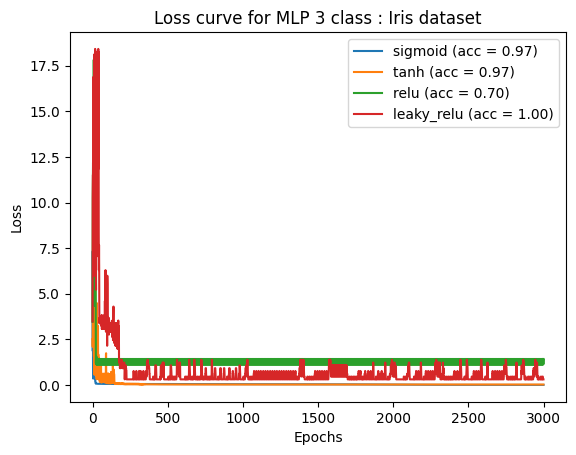

In [ ]:
for act in activations:
  losses, acc, predict = train_model(act)
  accuracies[act] = acc
  plt.plot(losses, label = f'{act} (acc ={acc: .2f})')
  print("losses", len(losses))

plt.title ("Loss curve for MLP 3 class : Iris dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#P4
(Report Accuracy of Each Activation)

In [ ]:
accuracies = {"sigmoid": 0.97, "tanh": 0.97, "relu": 0.70, "leaky_relu": 1.0}
print(accuracies)

{'sigmoid': 0.97, 'tanh': 0.97, 'relu': 0.7, 'leaky_relu': 1.0}


#P5
( Predict Class of a New Sample)

In [ ]:
X = np.array([[5.1, 3.5, 1.4, 0.2]])

# Normalize using the same scaler from training
sample_scaled = scaler.transform(X)  # [1][4][7]

# Pass to predict function and print the predicted class index
predicted_class = predict(sample_scaled)
print("Predicted class index:", predicted_class[0])

Predicted class index: [1. 0. 0.]
